<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
iris_data = load_iris()
iris_data

In [ ]:
data = iris_data['data']
target = iris_data['target'] #0,1,2
tnames = iris_data['target_names']
for i,y in enumerate(target):
  print(f"{i}:{tnames[y]}") #각각의 클래스마다 50개의 데이터로 이루어져 있음을 알 수 있다

In [30]:
sepal_lengths = data[:50,[0]] #setosa 품종의 sepal_length만 추출 (독립 변수로 사용하기 위해 2차원 배열로) - 150개
#sepal_lengths
sepal_widths = data[:50,1] #setosa 품종의 sepal_length만 추출 (종속 변수로 사용하기 위해 2차원 배열로)
#sepal_widths

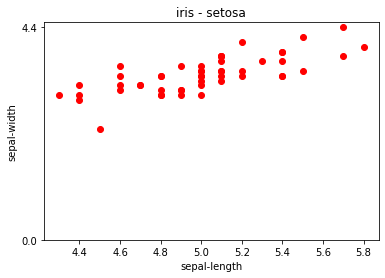

In [31]:
import matplotlib.pyplot as plt
plt.plot(sepal_lengths[:,0],sepal_widths,'ro',label='setosa')
plt.yticks([0,max(sepal_widths)]) #y축 ticks값 수치로 지정 가능 -> y값들이 축에 표시되지 않음
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.title('iris - setosa')
plt.show()
#너비가 커지면 길이도 커지는 약한 정비례 관계임을 유추할 수 있음

In [32]:
#기존의 fit함수를 사용하지 않고 직접 학습용과 테스트용을 나눔

train_xs = sepal_lengths[:len(sepal_lengths)*2//3]
train_ys = sepal_widths[:len(sepal_widths)*2//3]
test_xs = sepal_lengths[len(sepal_lengths)*2//3:]
test_ys = sepal_widths[len(sepal_widths)*2//3:]
print(f"학습용 길이:{len(train_ys)} 테스트용 길이:{len(test_ys)}")

학습용 길이:33 테스트용 길이:17


#거리 계산

In [33]:
import numpy as np

def distance(x1,x2):
  if isinstance(x1,int) and isinstance(x2,int): # 두 개의 값이 모두 int형식일 때
    return np.abs(x2-x1) #차이의 절대값을 반환
  if isinstance(x1,list) and isinstance(x2,list):
    x1 = np.array(x1)
    x2 = np.array(x2)
  return sum((x1-x2)**2)**(1/2)

In [34]:
na1 = np.array([1,2])
na2 = np.array([4,6])
assert distance(na1,na2) == 5.0, "거리 계산 오류" #제대로 작동하면 출력X, 오류나면 해당 문구 출력
#모듈로 만들 때에는 assert로 테스트하는 습관 필요

#K개의 가까운 이웃을 찾기

In [38]:
def find_k_nearest_neighbor(xs, ys, tx, k=5):
    """
    입력:
        xs:독립변수(학습데이터)
        ys:종속변수(학습데이터)
        tx:독립변수(예측에 사용할 신입)
        k:찾을 이웃 수
    반환:k개의 이웃의 y의 평균값
    """
    sarr = []
    for i, x in enumerate(xs):
        dis = distance(x, tx)
        sarr.append((dis, i))  #계산한 거리와 인덱스를 보관

    sarr.sort(key=lambda x:x[0])  #dis순으로 정렬
    k = min(k, len(sarr))  #현재 학습데이터 개수와 k 중에 최솟값을 k로 확정
    neighbors = [x[1] for x in sarr[:k]]  #거리가 가까운 이웃 k개의 인덱스로 리스트 구성
    return sum(ys[neighbors])/k  #이웃의 평균 값을 반환

In [39]:
def find_k_nearest_neighbors(xs, ys, t_xs, k=5):
    return [find_k_nearest_neighbor(xs, ys, tx, k) for tx in t_xs]

In [41]:
pred_val = find_k_nearest_neighbors(train_xs, train_ys, test_xs)
#print(find_k_nearest_neighbor(train_xs, train_ys, [3]))
pred_val

[3.66,
 3.22,
 3.38,
 3.66,
 3.22,
 3.2,
 3.56,
 3.38,
 3.2399999999999998,
 3.2,
 3.38,
 3.56,
 3.22,
 3.56,
 3.3,
 3.72,
 3.38]

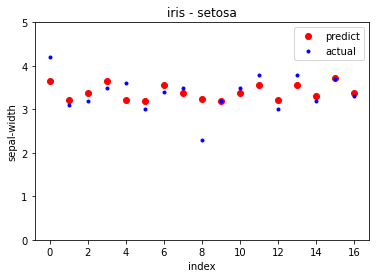

In [43]:
plt.plot(pred_val,'ro',label='predict')
plt.plot(test_ys,'b.',label='actual')
plt.ylim(0,5)
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris - setosa")
plt.legend()
plt.show()

#거의 유사하게 예측

In [44]:
print(np.mean(np.abs(pred_val-test_ys)/test_ys))

0.07213767474452305


In [46]:
from sklearn.neighbors import KNeighborsRegressor

knr_model = KNeighborsRegressor(n_neighbors=3) #모델 개체 생성
knr_model.fit(train_xs,train_ys) #학습
pred_val2 = knr_model.predict(test_xs) #예측

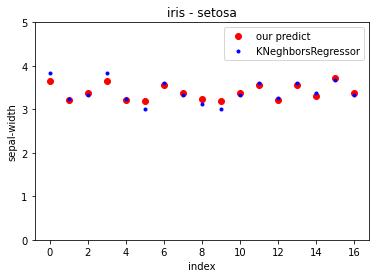

In [47]:
plt.plot(pred_val,'ro',label='our predict')
plt.plot(pred_val2,'b.',label='KNeghborsRegressor')
plt.ylim(0,5)
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris - setosa")
plt.legend()
plt.show()

#거의 유사

In [48]:
print(find_k_nearest_neighbor(train_xs,train_ys,[3,4]))
print(find_k_nearest_neighbor(train_xs,train_ys,[6])) #우리의 표본 범위를 벗어난 경우
print(find_k_nearest_neighbor(train_xs,train_ys,[8]))
print(find_k_nearest_neighbor(train_xs,train_ys,[80]))

3.2
3.9599999999999995
3.9599999999999995
3.9599999999999995


위와 같이 KNN에서 독립변수에 특징이 여러 개이고 특성에 따라 크기의 차이가 상당할 때

In [60]:
train_xs2 = np.array([[180,0.84],[190,0.89],[120,0.32],[150,0.49],[160,0.58],[170,0.65]]) #키와 몸무게
train_ys2 = np.array([32,33,24,26,30,31]) #허리둘레 
print(find_k_nearest_neighbor(train_xs2,train_ys2,[210,1.10],k=1)) #키가 210, 몸무게가 110kg 일 때, 가장 가까운 허리 둘레값 출력
print(find_k_nearest_neighbor(train_xs2,train_ys2,[187,0.84],k=1)) #키가 186, 몸무게가 88kg 일 때, 가장 가까운 허리 둘레값 출력

33.0
32.0


In [63]:
distance([180,0.84],[186,0.84]),distance([190,0.89],[186,0.84])

(6.0, 4.000312487793923)

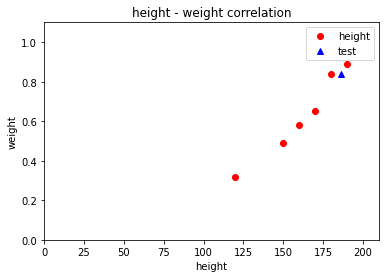

In [62]:
plt.plot(train_xs2[:,0],train_xs2[:,1],'ro',label='height')
plt.plot([186],[0.84],'b^',label="test")
plt.xlim(0,210)
plt.ylim(0,1.10)
plt.xlabel('height')
plt.ylabel('weight')
plt.title('height - weight correlation')
plt.legend()
plt.show()

# 스케일 조절의 필요성

In [66]:
heights = train_xs2[:,0]
hm= heights.mean()
hs = heights.std()
heights2 = heights-hm #수평 이동
heights3 = heights2/hs #표준 편차 만큼 비율 조절

hm3 = heights3.mean()
hs3 = heights3.std()
hm3,hs3

(3.978299171573478e-16, 1.0)

In [68]:
weights = train_xs2[:,1]
wm= weights.mean()
ws = weights.std()

weights2 = weights-wm #수평 이동
weights3 = weights2/ws #표준 편차 만큼 비율 조절

wm3 = weights3.mean()
ws3 = weights3.std()
wm3,ws3

(1.3415194880887307e-16, 1.0)

In [70]:
rescaled_train_xs = np.array([[heights3[i],w] for i,w in enumerate(weights3)])
rescaled_train_xs

array([[ 0.80873608,  1.08043052],
       [ 1.24986486,  1.33565032],
       [-1.83803656, -1.57385548],
       [-0.51465024, -0.70610813],
       [-0.07352146, -0.24671248],
       [ 0.36760731,  0.11059525]])

In [72]:
h = 186
w = 0.84
w3 = (w-wm)/ws
h3 = (h-hm)/hs

h3,w3 #스케일을 조절한 값으로 검색해야 한다

(1.0734133482569597, 1.08043051632241)

In [73]:
print(find_k_nearest_neighbor(rescaled_train_xs,train_ys2,[h3,w3],k=1))

32.0


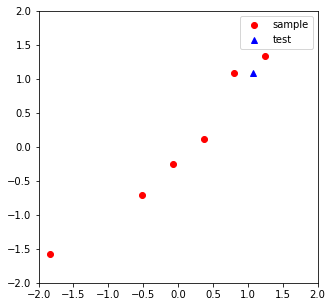

In [74]:
plt.figure(figsize=(5,5))
plt.plot(rescaled_train_xs[:,0],rescaled_train_xs[:,1],'ro',label='sample')
plt.plot([h3],[w3],'b^',label="test")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.show()

#기계학습
1. 지도 학습 : 독립 변수와 종속 변수로 학습  
  - 회귀
  - 분류
2. 비지도 학습 : 종속 변수 X
  - 군집화
  - 강화
  - 이상점